In [100]:
import numpy
from scipy import stats
import matplotlib.pyplot as plt

from elegant.torch import dataset
from elegant import datamodel
from keypoint_annotation.dataloaders import training_dataloaders

from elegant_scripts import keypoint_reproducibility_helpers
import straightening_analysis_utils
import mask_generation
import measurement_funcs

In [2]:
exp_root1 = '/Volumes/lugia_array/20170919_lin-04_GFP_spe-9/'
exp_root2 = '/Volumes/lugia_array/20190408_lin-4_spe-9_20C_pos-1/'
#exp_root2 = '/mnt/9karray/Mosley_Matt/20190408_lin-4_spe-9_20C_pos-1/'
exp_root3 = '/Volumes/lugia_array/20190813_lin4gfp_spe9_control/20190813_lin4gfp_spe9_control/'
#exp_root3 = '/mnt/scopearray/Mosley_Matt/glp-1/20190813_lin4gfp_spe9_control'
experiments = [datamodel.Experiment(path) for path in (exp_root1, exp_root2, exp_root3)]

#filter experiments to only get adult timepoints
experiments[0].filter(timepoint_filter=(keypoint_reproducibility_helpers.filter_holly_data))
experiments[1].filter(timepoint_filter=keypoint_reproducibility_helpers.filter_adults)
experiments[2].filter(timepoint_filter=keypoint_reproducibility_helpers.filter_adults)

#once we get the ages, need to filter ones with poses (need to do it this way because the calculate adult_age assumes the first timepoint
#is the first adult age)
for experiment in experiments:
    experiment.filter(timepoint_filter=(keypoint_reproducibility_helpers.has_pose, keypoint_reproducibility_helpers.has_keypoints))

#make at timepoint list and save out the timepoint paths
timepoint_list = datamodel.Timepoints.from_experiments(*experiments)

In [117]:
import importlib
importlib.reload(straightening_analysis_utils)
tp = timepoint_list[0]
measurements = straightening_analysis_utils.measure_timepoint(tp, mask_generation.generate_worm_masks, [measurement_funcs.measure_area], ['area'])

FileNotFoundError: No such file: /Volumes/lugia_array/20170919_lin-04_GFP_spe-9/000/2017-09-22t0300 bf.png

In [17]:
tp.annotations.update(measurements)

In [74]:
importlib.reload(straightening_analysis_utils)
importlib.reload(mask_generation)
importlib.reload(measurement_funcs)
measures = [measurement_funcs.measure_integrated_gfp, measurement_funcs.measure_emd]
masks = [mask_generation.generate_checkerboard_slice_masks]
channels = ['bf', 'gfp']
mnames = ['pixel intensity', 'emd']
straightening_analysis_utils.measure_timepoint_list(timepoint_list[:5], mask_generation.generate_checkerboard_slice_masks, measures, mnames)

In [78]:
importlib.reload(straightening_analysis)
measurement_list = straightening_analysis.extract_slice_measurements(timepoint_list[:5], [mnames[1]])
pixel_intensity = straightening_analysis.extract_slice_area_measurements(timepoint_list[:5], [mnames[0]])
measurement_list.update(pixel_intensity)
measurement_list

{'emd': {'consecutive timepoint measurements': [16978.28895254162,
   29575.905408334394,
   20388.047629865985,
   23977.66891990139,
   20861.77788802876],
  'warp to unwarped': [2577.098261990694,
   2012.3984781871816,
   2246.9487287072284,
   1992.4844381690734,
   2360.6234830769754],
  'worm vs random worm': [27553.550029139198,
   35708.1673387461,
   34855.02355516731,
   27448.172323709063,
   25064.714898560065],
  'Identifier': [Timepoint(Position('20170919_lin-04_GFP_spe-9', '000'), '2017-09-22t0300'),
   Timepoint(Position('20170919_lin-04_GFP_spe-9', '000'), '2017-09-22t0700'),
   Timepoint(Position('20170919_lin-04_GFP_spe-9', '000'), '2017-09-22t1111'),
   Timepoint(Position('20170919_lin-04_GFP_spe-9', '000'), '2017-09-22t1520'),
   Timepoint(Position('20170919_lin-04_GFP_spe-9', '000'), '2017-09-22t1848')]},
 'pixel intensity': {'consecutive timepoint measurements': [0.21343807612605428,
   0.23041090275451642,
   0.3538307207179283,
   0.22939774417445044,
   0.196

In [43]:
measures = [measurement_funcs.measure_integrated_gfp, measurement_funcs.measure_emd]
masks = [mask_generation.generate_checkerboard_slice_masks]
channels = ['bf', 'gfp']
mnames = ['pixel intensity', 'emd']

In [44]:
results = {}
for measurement, m in zip(measures, mnames):
    straightening_analysis.measure_timepoint_list(timepoint_list[:5], mask_generation.generate_checkerboard_slice_masks, measurement)
    extracted = straightening_analysis.extract_slice_measurements(timepoint_list[:5])
    results[m] = extracted

NameError: name 'measurements' is not defined

In [48]:
for i, z in enumerate(zip(measures, mnames)):
    measurement, m = z
    print(i, measurement, m)

0 <function measure_integrated_gfp at 0x7f83d1735d40> pixel intensity
1 <function measure_emd at 0x7f83d1730cb0> emd


In [118]:
summary_stats = straightening_analysis_utils.summary_stats(measurement_list)
summary_stats

{'emd': {'consecutive timepoint measurements': {'mean': 22356.337759734433,
   'std': 4237.502943518458,
   'min': 16978.28895254162,
   'max': 29575.905408334394,
   'variance': 17956431.196327593},
  'warp to unwarped': {'mean': 2237.9106780262305,
   'std': 219.67163107049316,
   'min': 1992.4844381690734,
   'max': 2577.098261990694,
   'variance': 48255.62549717086},
  'worm vs random worm': {'mean': 30125.925629064346,
   'std': 4311.127990444847,
   'min': 25064.714898560065,
   'max': 35708.1673387461,
   'variance': 18585824.54999702}},
 'pixel intensity': {'consecutive timepoint measurements': {'mean': 0.24468630133356153,
   'std': 0.055968720046939306,
   'min': 0.19635406289485804,
   'max': 0.3538307207179283,
   'variance': 0.003132497623692666},
  'warp to unwarped': {'mean': 0.09960725060313902,
   'std': 0.016771274921813135,
   'min': 0.07086917396120099,
   'max': 0.11971097458820344,
   'variance': 0.0002812756625030382},
  'worm vs random worm': {'mean': 0.4543890

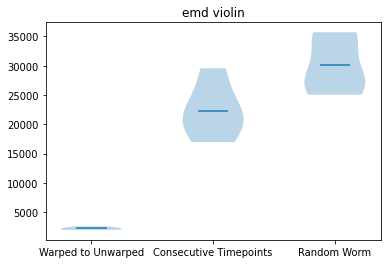

In [96]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def plot_violin(measurement_list, title):
    """Create a violin plot of the data from the measurement list.
    Note: the extract functions give this list
    """
    fig, ax = plt.subplots()
    positions = numpy.array([1,2,3])

    plot_list = []
    colors = ['blue','orange']
    
    ax.violinplot([measurement_list['warp to unwarped'], measurement_list['consecutive timepoint measurements'], 
            measurement_list['worm vs random worm']], positions, showmeans=True, showextrema=False)
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(['Warped to Unwarped', 'Consecutive Timepoints', 'Random Worm'])
    ax.set_y
    ax.set_title(title)
    

plot_violin(measurement_list['emd'], 'emd violin')

In [111]:
importlib.reload(straightening_analysis_utils)
straightening_analysis_utils.plot_violin(measurement_list['emd'], 'emd violin', '.','test', ylabel='EMD values' )

In [109]:
t = 'emd'
save_dir = pathlib.Path('/Users/nlaird')
save_file = save_dir/str(t+'.png')
save_file

PosixPath('/Users/nlaird/emd.png')

In [137]:
save_dir = './test'
if not os.path.exists(save_dir): os.makedirs(save_dir)
for measurement, m_list in measurement_list.items():
    title = 'Distribution of {} in straightening analyses'.format(measurement)
    if 'emd' in measurement:
        straightening_analysis_utils.plot_violin(m_list, title, save_dir, measurement, ylabel='EMD values')
    else:
        straightening_analysis_utils.plot_violin(m_list, title, save_dir, measurement)

In [5]:
import straightening_analysis_script
import platform
save_dir = './test'
os = platform.system()
straightening_analysis_script.run_straightening_analysis(os, save_dir)


Darwin


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/lugia_array/20170919_lin-04_GFP_spe-9/experiment_metadata.json'